In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation 

# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

# text preprocessing modules
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression

import joblib 

from wordcloud import WordCloud, STOPWORDS

# Download dependency
for dependency in (
    "brown",
    "names",
    "wordnet",
    "averaged_perceptron_tagger",
    "universal_tagset",
):
    nltk.download(dependency)


import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [3]:
data=pd.read_csv("spam.tsv",sep="\t")
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [5]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
data['length'].max()

910

In [7]:
data['length'].min()

2

In [8]:
filtered_df = data[data['length'] == 2]

shortest_message = filtered_df.iloc[0]['message']

print(shortest_message)

Ok


In [9]:
filtered_df = data[data['length'] == 910]

taller_message = filtered_df.iloc[0]['message']

print(taller_message)

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


In [10]:
data[data['label']=='ham'].head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [11]:
data[data['label']=='spam'].head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [12]:
new_data=data.replace({'ham':0,'spam':1})
new_data.head(10)

,label,message,length,punct
0,0,"Go until jurong point, crazy.. Available only ...",111,9
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,0,U dun say so early hor... U c already then say...,49,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,0,Even my brother is not like to speak with me. ...,77,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,1,WINNER!! As a valued network customer you have...,157,6
9,1,Had your mobile 11 months or more? U R entitle...,154,2


In [13]:
#words is always repeted in text like the and he she .. etc
stop_words=stopwords.words('english')

def clean_data(text,remove_stop_words=True,lemmatize_words=True):
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"ur", " your ", text)
    text = re.sub(r" nd "," and ",text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r" tkts "," tickets ",text)
    text = re.sub(r" c "," can ",text)
    text = re.sub(r" e g ", " eg ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
    text = re.sub(r" u "," you ",text)
    text = text.lower()  # set in lowercase 
    
    text=''.join([c for c in text if c not in punctuation])
    
    if remove_stop_words:
        text=text.split()
        text=[w for w in text if w not in stop_words]
        text=" ".join(text)
     #return words to his  original it's meaning no ing or ed .. etc   
    if lemmatize_words:
        text=text.split()
        limmitizer=WordNetLemmatizer()
        lemmatized_words = [limmitizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
        
    return(text)    
        

In [14]:
new_data['clean_message']=new_data['message'].apply(clean_data)

In [15]:
new_data.head()

,label,message,length,punct,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",111,9,go j ong point crazy available bugis n great w...
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,free entry wkly comp win fa cup final ticket 2...
3,0,U dun say so early hor... U c already then say...,49,6,u dun say early hor u already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2,nah think go usf life around though


In [16]:
X=new_data['clean_message']
y=new_data['label']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,shuffle=True,stratify=y)


In [42]:
#convert object to vectors to use in train because we ca not train string data
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(x_train)

#transform train data 
X_train_trans = vectorizer.transform(x_train)

#transform test data
X_text_trans = vectorizer.transform(x_test)

In [43]:
spam_classifier = MultinomialNB()


In [44]:
scores = cross_val_score(spam_classifier,X_train_trans,y_train,cv=10,verbose=3,n_jobs=-1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [45]:
print(scores.mean())
print(scores)

0.970439603571779
[0.97890295 0.97046414 0.97468354 0.96413502 0.96624473 0.96624473
 0.9577167  0.98308668 0.97251586 0.97040169]


In [46]:
#get best hypterparametrs 
#alpha is a smoothing parameter in MultinomialNB is used to make sure prob is not qual zero
distribution={'alpha':[1,0.1,0.01,0.0001,0,0.2,0.3]}
grid=RandomizedSearchCV(
    spam_classifier,
    param_distributions=distribution,
    n_jobs=-1,
    n_iter=20,
    random_state=42,
    return_train_score=True,
    verbose=2,
    
)

In [47]:
grid.fit(X_train_trans,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


RandomizedSearchCV(estimator=MultinomialNB(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [1, 0.1, 0.01, 0.0001, 0, 0.2,
                                                  0.3]},
                   random_state=42, return_train_score=True, verbose=2)

In [48]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.970438070032392
MultinomialNB(alpha=1)
{'alpha': 1}


In [49]:
best_classifier=MultinomialNB(alpha=1)

In [50]:
best_scores = cross_val_score(best_classifier,X_train_trans,y_train,cv=10,verbose=2,n_jobs=-1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [51]:
print(best_scores)
print(best_scores.mean())

[0.97890295 0.97046414 0.97468354 0.96413502 0.96624473 0.96624473
 0.9577167  0.98308668 0.97251586 0.97040169]
0.970439603571779


In [52]:
best_classifier.fit(X_train_trans,y_train)

MultinomialNB(alpha=1)

In [65]:
y_pred = best_classifier.predict(X_text_trans)


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       724
           1       0.96      0.93      0.95       112

    accuracy                           0.99       836
   macro avg       0.98      0.96      0.97       836
weighted avg       0.99      0.99      0.99       836



<Axes: >

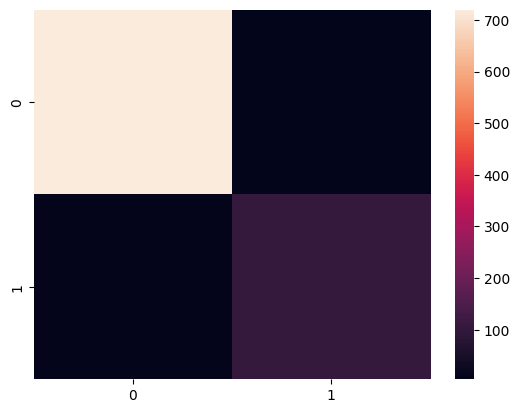

In [78]:

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm)

In [69]:
accuracy_score(y_test,y_pred)

0.9856459330143541

In [70]:
f1_score(y_test,y_pred)

0.9454545454545454

In [74]:
joblib.dump(best_classifier, 'models/spam-detection-model.pkl')


['models/spam-detection-model.pkl']

In [76]:
joblib.dump(vectorizer,'preprocessing/count_vectorizer.pkl')


['preprocessing/count_vectorizer.pkl']